# Data analysis for all data collected during our project
 

#### imports and  loading Data 

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

dfCounting = pd.read_csv("Results16/countingSort-PC16.csv")
dfCounting.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

dfQuickSort = pd.read_csv("Results16/quickSort-PC16.csv")
dfQuickSort.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

dfBubbleSort = pd.read_csv("Results16/bubbleSort-PC16.csv")
dfBubbleSort.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

dfMergeSort = pd.read_csv("Results16/mergeSort-PC16.csv")
dfMergeSort.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

dfReadCSV = pd.read_csv("Results16/readCSV-PC16.csv")
dfReadCSV.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]


#### Moving information from Test name to a seperate column 

In [2]:
#input type
l = []
for i in range(len(dfCounting)):
    l.append(dfCounting.iloc[i]["Test name"].split("-")[0])

dfCounting["Input case"] = l


l = []
for i in range(len(dfQuickSort)):
    l.append(dfQuickSort.iloc[i]["Test name"].split("-")[0])

dfQuickSort["Input case"] = l



l = []
for i in range(len(dfBubbleSort)):
    l.append(dfBubbleSort.iloc[i]["Test name"].split("-")[0])

dfBubbleSort["Input case"] = l


l = []
for i in range(len(dfMergeSort)):
    l.append(dfMergeSort.iloc[i]["Test name"].split("-")[0])

dfMergeSort["Input case"] = l

In [3]:
#input size
l = []
for i in range(len(dfCounting)):
    l.append(dfCounting.iloc[i]["Test name"].split("-")[1])

dfCounting["Size"] = l


l = []
for i in range(len(dfQuickSort)):
    l.append(dfQuickSort.iloc[i]["Test name"].split("-")[1])

dfQuickSort["Size"] = l



l = []
for i in range(len(dfBubbleSort)):
    l.append(dfBubbleSort.iloc[i]["Test name"].split("-")[1])

dfBubbleSort["Size"] = l


l = []
for i in range(len(dfMergeSort)):
    l.append(dfMergeSort.iloc[i]["Test name"].split("-")[1])

dfMergeSort["Size"] = l


l = []
for i in range(len(dfReadCSV)):
    l.append(dfReadCSV.iloc[i]["Test name"].split("d")[-1])

dfReadCSV["Size"] = l

In [4]:


#removing values that are nonsense 
dfCounting = dfCounting[dfCounting['PKG (J)'] >= 0]
dfCounting = dfCounting[dfCounting['CPU (J)'] >= 0]
#df = df[df['Memory (byte)'] >= 0]
#df = df[df['Temperature'] >= 0]
dfCounting = dfCounting[dfCounting['Time (ms)'] >= 0]

dfCounting = dfCounting.replace("  ", np.nan)

#missing values for each column
print("MISSING DATA: \n\n ", dfCounting.isnull().sum(axis=0))

dfReadCSV["Time (ms)"].sum()/1000/60/60


MISSING DATA: 

  Test name          0
PKG (J)            0
CPU (J)            0
GPU (J)        20799
Memory (J)         0
Temperature        0
Time (ms)          0
Input case         0
Size               0
dtype: int64


5.783314213333333

#### Removing ourliers

#### Subtract readCSV from data

In [5]:
#Counting sort
bgAVGrand = []
bgAVGWorst = []
bgAVGBest = []
s = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
l = []
for size in range(len(s)):
    bgAVGrand.append(dfReadCSV[dfReadCSV["Test name"] == f"readCSVCountingRand{s[size]}"].mean())

for size in range(len(s)):
    bgAVGWorst.append(dfReadCSV[dfReadCSV["Test name"] == f"readCSVCountingBest{s[size]}"].mean())

for size in range(len(s)):
    bgAVGBest.append(dfReadCSV[dfReadCSV["Test name"] == f"readCSVCountingWorst{s[size]}"].mean())

for i in range(len(dfCounting)):
    for size in range(len(s)):
        if (int(dfCounting["Size"][i]) == s[size]):
            if(dfCounting["Input case"][i] != "worst" and dfCounting["Input case"][i] != "best"):
                l.append(dfCounting["CPU (J)"][i] - bgAVGrand[size]["CPU (J)"])
            if(dfCounting["Input case"][i] == "best"):
                l.append(dfCounting["CPU (J)"][i] - bgAVGBest[size]["CPU (J)"])                                         
            if(dfCounting["Input case"][i] == "worst"):
                l.append(dfCounting["CPU (J)"][i] - bgAVGWorst[size]["CPU (J)"])                               

dfCounting["CPU - BG"] = l
dfCounting[dfCounting["Input case"] == "best"]


,Test name,PKG (J),CPU (J),GPU (J),Memory (J),Temperature,Time (ms),Input case,Size,CPU - BG
10399,best-25000-1,1.878296,1.601929,NaN,0.118958,62,223.673,best,25000,NaN
10400,best-25000-1,1.876892,1.619263,NaN,0.113342,62,195.949,best,25000,NaN
10401,best-25000-1,1.891479,1.635620,NaN,0.111633,62,196.755,best,25000,NaN
10402,best-25000-1,1.797913,1.523071,NaN,0.118103,62,216.795,best,25000,NaN
10403,best-25000-1,1.755127,1.432678,NaN,0.127747,62,281.388,best,25000,NaN
...,...,...,...,...,...,...,...,...,...,...
15594,best-1000000-1,6.719788,5.797974,NaN,0.380432,71,713.453,best,1000000,NaN
15595,best-1000000-1,6.539246,5.623535,NaN,0.380737,71,725.147,best,1000000,NaN
15596,best-1000000-1,6.512512,5.608704,NaN,0.366638,71,724.385,best,1000000,NaN
15597,best-1000000-1,6.630493,5.714172,NaN,0.381470,70,707.163,best,1000000,NaN


In [6]:
#Bubblesort
bgAVGbubbleRand = []
s = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
l = []
for size in range(len(s)):
    bgAVGbubbleRand.append(dfReadCSV[dfReadCSV["Test name"] == f"readCSVRand{s[size]}"].mean())

for i in range(len(dfBubbleSort)):
    for size in range(len(s)):
        if (int(dfBubbleSort["Size"][i]) == s[size]):
            if(dfBubbleSort["Input case"][i] != "worst" and dfBubbleSort["Input case"][i] != "best"):
                l.append(dfBubbleSort["CPU (J)"][i] - bgAVGbubbleRand[size]["CPU (J)"])
            if(dfBubbleSort["Input case"][i] == "best"):
                l.append(0)                                         # We're missing sorted. Has been named "revsorted" in the Makefile for readCSV
            if(dfBubbleSort["Input case"][i] == "worst"):
                l.append(0)                                         # we need to redo rev-sorted. has been mixed with revsorted in the Makefile for readCSV

dfBubbleSort["CPU - BG"] = l

dfBubbleSort


,Test name,PKG (J),CPU (J),GPU (J),Memory (J),Temperature,Time (ms),Input case,Size,CPU - BG
0,random1-25000-1,13.232300,11.544128,,0.399902,69,1710.16,random1,25000,NaN
1,random1-25000-1,14.163696,12.361511,,0.493103,69,1723.56,random1,25000,NaN
2,random1-25000-1,13.530029,11.768127,,0.451172,69,1730.49,random1,25000,NaN
3,random1-25000-1,14.085632,12.302307,,0.486084,70,1704.74,random1,25000,NaN
4,random1-25000-1,14.142822,12.376465,,0.485718,70,1699.14,random1,25000,NaN
...,...,...,...,...,...,...,...,...,...,...
11755,worst-500000-1,815.602600,719.116455,,18.233643,64,107186.00,worst,500000,0.0
11756,worst-500000-1,806.500366,709.628906,,19.146301,57,107578.00,worst,500000,0.0
11757,worst-500000-1,808.787598,712.215637,,18.715515,63,107361.00,worst,500000,0.0
11758,worst-500000-1,810.676819,712.063965,,20.324219,57,108984.00,worst,500000,0.0


In [7]:
#Mergesort
bgAVGrand = []
bgAVGWorst = []
bgAVGBest = []
s = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
l = []
for size in range(len(s)):
    bgAVGrand.append(dfReadCSV[dfReadCSV["Test name"] == f"readCSVRand{s[size]}"].mean())
for size in range(len(s)):
    bgAVGWorst.append(dfReadCSV[dfReadCSV["Test name"] == f"readCSVMergeWorst{s[size]}"].mean())
for size in range(len(s)):
    bgAVGBest.append(dfReadCSV[dfReadCSV["Test name"] == f"readCSVMergeBest{s[size]}"].mean())

for i in range(len(dfMergeSort)):
    for size in range(len(s)):
        if (int(dfMergeSort["Size"][i]) == s[size]):
            if(dfMergeSort["Input case"][i] != "worst" and dfMergeSort["Input case"][i] != "best"):
                l.append(dfMergeSort["CPU (J)"][i] - bgAVGrand[size]["CPU (J)"])
            if(dfMergeSort["Input case"][i] == "best"):
                l.append(0)                                         # We're missing sorted. Has been named "revsorted" in the Makefile for readCSV
            if(dfMergeSort["Input case"][i] == "worst"):
                l.append(dfMergeSort["CPU (J)"][i] - bgAVGWorst[size]["CPU (J)"])                                         # we need to redo rev-sorted. has been mixed with revsorted in the Makefile for readCSV

dfMergeSort["CPU - BG"] = l

dfMergeSort[dfMergeSort["Input case"]=="best"]


,Test name,PKG (J),CPU (J),GPU (J),Memory (J),Temperature,Time (ms),Input case,Size,CPU - BG
6399,best-25000-1,2.144348,1.843567,,0.133606,72,209.112,best,25000,0.0
6400,best-25000-1,2.076294,1.757446,,0.127869,72,241.316,best,25000,0.0
6401,best-25000-1,2.113647,1.822815,,0.119995,72,212.796,best,25000,0.0
6402,best-25000-1,2.221313,1.927490,,0.131714,72,214.291,best,25000,0.0
6403,best-25000-1,2.150085,1.861267,,0.121155,72,212.584,best,25000,0.0
...,...,...,...,...,...,...,...,...,...,...
11594,best-1000000-1,7.467285,6.437561,,0.411072,72,805.561,best,1000000,0.0
11595,best-1000000-1,8.039001,6.894043,,0.473633,72,861.733,best,1000000,0.0
11596,best-1000000-1,7.963867,6.857239,,0.462646,71,828.897,best,1000000,0.0
11597,best-1000000-1,8.168213,7.050232,,0.470093,71,841.059,best,1000000,0.0


In [8]:
#Quicksort
bgAVGrand = []
bgAVGWorst = []
bgAVGBest = []
s = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
l = []
for size in range(len(s)):
    bgAVGrand.append(dfReadCSV[dfReadCSV["Test name"] == f"readCSVRand{s[size]}"].mean())
for size in range(len(s)):
    bgAVGWorst.append(dfReadCSV[dfReadCSV["Test name"] == f"readCSVMergeWorst{s[size]}"].mean())
for size in range(len(s)):
    bgAVGBest.append(dfReadCSV[dfReadCSV["Test name"] == f"readCSVQuickBest{s[size]}"].mean())

for i in range(len(dfQuickSort)):
    for size in range(len(s)):
        if (int(dfQuickSort["Size"][i]) == s[size]):
            if(dfQuickSort["Input case"][i] != "worst" and dfQuickSort["Input case"][i] != "best"):
                l.append(dfQuickSort["CPU (J)"][i] - bgAVGrand[size]["CPU (J)"])
            if(dfQuickSort["Input case"][i] == "best"):
                l.append(dfQuickSort["CPU (J)"][i] - bgAVGBest[size]["CPU (J)"])                                         
            if(dfQuickSort["Input case"][i] == "worst"):
                l.append(0)                                         # we need to redo rev-sorted. has been mixed with revsorted in the Makefile for readCSV

dfQuickSort["CPU - BG"] = l

## PLOTS

#### Basic plots (raw data vs size/time)

<AxesSubplot:title={'center':'countingsort data'}, xlabel='Size', ylabel='CPU (J)'>

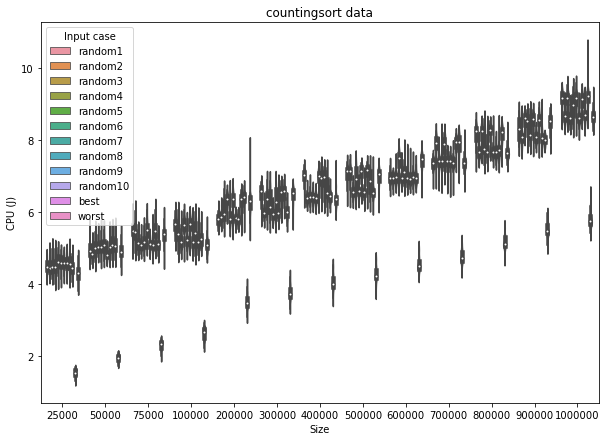

In [9]:
plt.figure(figsize=(10,7))
plt.title("countingsort data")
sns.violinplot(data = dfCounting, y = "CPU (J)", x = "Size", hue = "Input case")

<AxesSubplot:title={'center':'Quicksort data'}, xlabel='Size', ylabel='Time (ms)'>

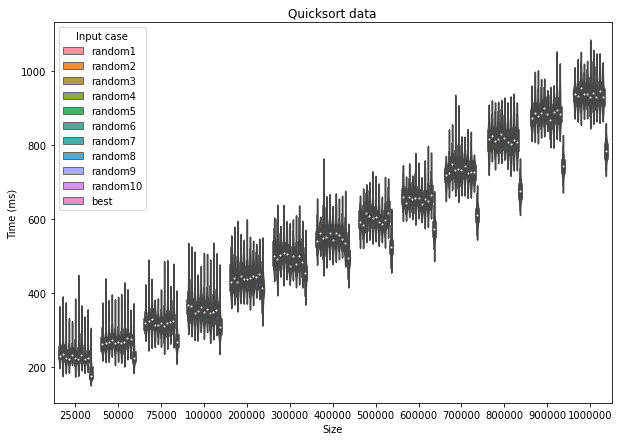

In [10]:
plt.figure(figsize=(10,7))
plt.title("Quicksort data")
sns.violinplot(data = dfQuickSort[dfQuickSort["Input case"] != "worst"], y = "Time (ms)", x = "Size", hue ="Input case")

<AxesSubplot:title={'center':'Bubblesort data'}, xlabel='Size', ylabel='Time (ms)'>

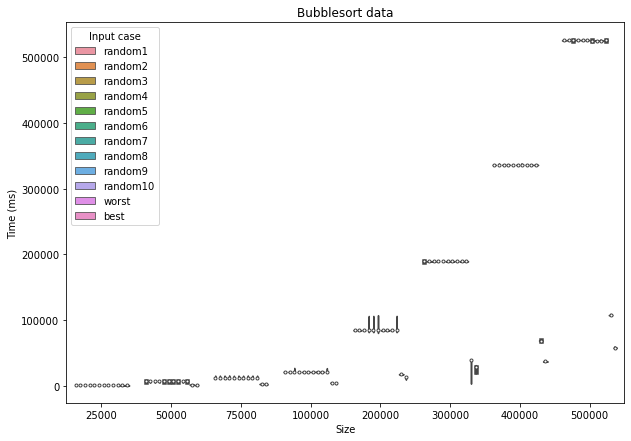

In [11]:
plt.figure(figsize=(10,7))
plt.title("Bubblesort data")
sns.violinplot(data = dfBubbleSort, y = "Time (ms)", x = "Size", hue ="Input case")

<AxesSubplot:title={'center':'Mergesort data'}, xlabel='Size', ylabel='Time (ms)'>

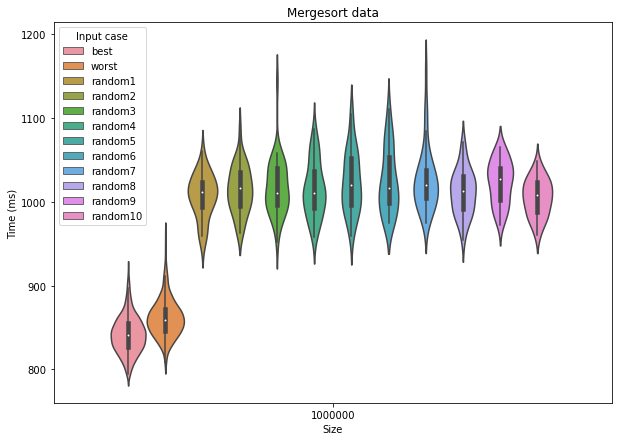

In [12]:
plt.figure(figsize=(10,7))
plt.title("Mergesort data")
sns.violinplot(data = dfMergeSort[dfMergeSort["Size"] == "1000000"], y = "Time (ms)", x = "Size", hue ="Input case")

## ReadCSV subtracted from data PLOTS

<AxesSubplot:title={'center':'countingsort data'}, xlabel='Size', ylabel='CPU - BG'>

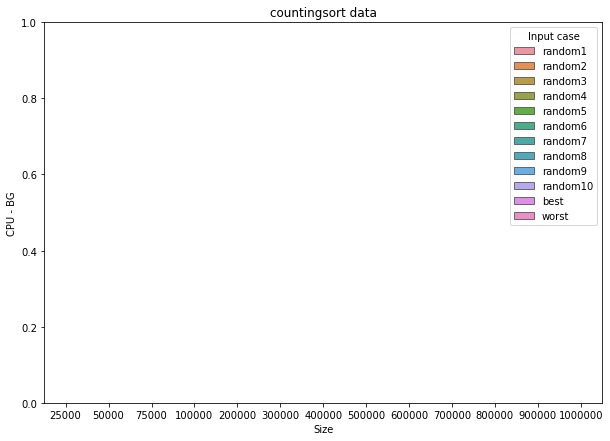

In [13]:
plt.figure(figsize=(10,7))
plt.title("countingsort data") # [dfCounting["Input case"]!="best"][dfCounting["Input case"]!="worst"]
sns.violinplot(data = dfCounting, y = "CPU - BG", x = "Size", hue = "Input case")

<AxesSubplot:title={'center':'Mergesort data'}, xlabel='Size', ylabel='CPU - BG'>

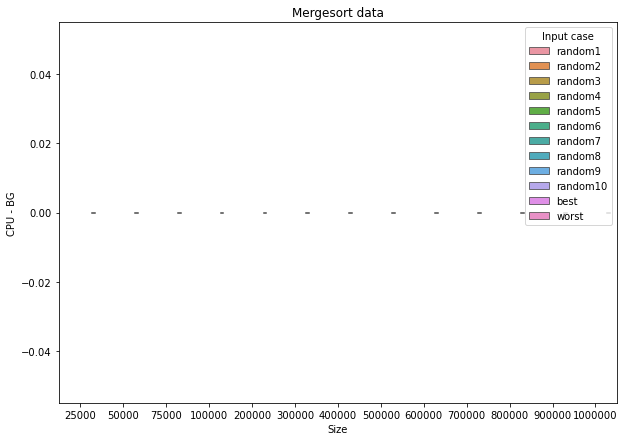

In [14]:
plt.figure(figsize=(10,7))
plt.title("Mergesort data") # [dfCounting["Input case"]!="best"][dfCounting["Input case"]!="worst"]
sns.violinplot(data = dfMergeSort, y = "CPU - BG", x = "Size", hue = "Input case")

<AxesSubplot:title={'center':'Mergesort data'}, xlabel='Size', ylabel='CPU - BG'>

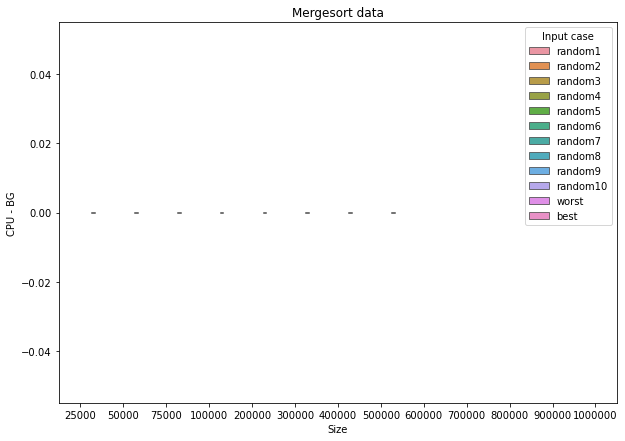

In [15]:
plt.figure(figsize=(10,7))
plt.title("Mergesort data") # [dfCounting["Input case"]!="best"][dfCounting["Input case"]!="worst"]
sns.violinplot(data = dfQuickSort, y = "CPU - BG", x = "Size", hue = "Input case")

<AxesSubplot:title={'center':'Mergesort data'}, xlabel='Size', ylabel='CPU - BG'>

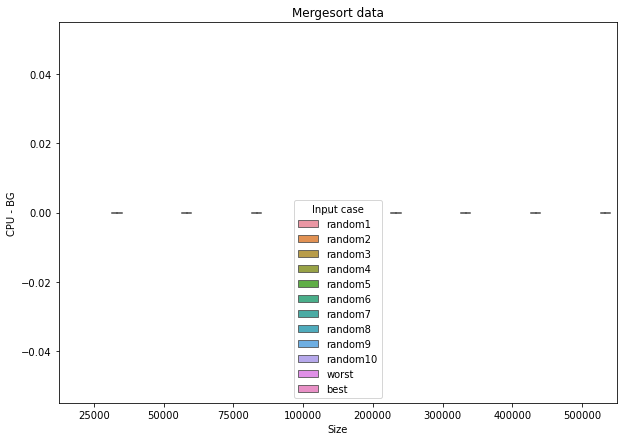

In [16]:
plt.figure(figsize=(10,7))
plt.title("Mergesort data") # [dfCounting["Input case"]!="best"][dfCounting["Input case"]!="worst"]
sns.violinplot(data = dfBubbleSort, y = "CPU - BG", x = "Size", hue = "Input case")

## AVG for each computer


#### Quicksort

In [17]:
quick16 = pd.read_csv("Results16/quickSort-PC16.csv")
quick16.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]
quick21 = pd.read_csv("Results21/quickSort-PC21.csv")
quick21.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]
quick23 = pd.read_csv("Results23/quickSort-PC23.csv") 
quick23.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]
quick6 = pd.read_csv("Results6/quickSort-PC6.csv")
quick6.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]
quick21

,Test name,PKG (J),CPU (J),GPU (J),Memory (J),Temperature,Time (ms)
0,random1-25000-1,2.153381,1.893677,,0.124512,29,220.583
1,random1-25000-1,2.171021,1.890686,,0.123047,29,223.840
2,random1-25000-1,2.138184,1.884949,,0.119690,29,213.484
3,random1-25000-1,2.313232,2.037598,,0.137939,29,223.535
4,random1-25000-1,2.163818,1.899353,,0.129150,29,222.574
...,...,...,...,...,...,...,...
14073,best-1000000-1,7.644104,6.685913,,0.410217,64,774.068
14074,best-1000000-1,7.567322,6.655640,,0.413513,64,739.080
14075,best-1000000-1,7.379944,6.455933,,0.386841,64,766.003
14076,best-1000000-1,7.692749,6.727966,,0.417664,65,762.062


In [18]:
def removeNonsense(df):
    df = df[df["PKG (J)"]>=0]
    df = df[df["CPU (J)"]>=0]
    df = df[df["Time (ms)"]>=0]
    return df

quick21 = removeNonsense(quick21)
quick16 = removeNonsense(quick16)
quick23 = removeNonsense(quick23)
quick6 = removeNonsense(quick6)


In [19]:
def makeinputColumn(df):
    l = []
    for i in range(len(df)):
        l.append(df.iloc[i]["Test name"].split("-")[0])

    df["Input case"] = l
makeinputColumn(quick21)
makeinputColumn(quick23)
makeinputColumn(quick6)
makeinputColumn(quick16)
quick21

,Test name,PKG (J),CPU (J),GPU (J),Memory (J),Temperature,Time (ms),Input case
0,random1-25000-1,2.153381,1.893677,,0.124512,29,220.583,random1
1,random1-25000-1,2.171021,1.890686,,0.123047,29,223.840,random1
2,random1-25000-1,2.138184,1.884949,,0.119690,29,213.484,random1
3,random1-25000-1,2.313232,2.037598,,0.137939,29,223.535,random1
4,random1-25000-1,2.163818,1.899353,,0.129150,29,222.574,random1
...,...,...,...,...,...,...,...,...
14073,best-1000000-1,7.644104,6.685913,,0.410217,64,774.068,best
14074,best-1000000-1,7.567322,6.655640,,0.413513,64,739.080,best
14075,best-1000000-1,7.379944,6.455933,,0.386841,64,766.003,best
14076,best-1000000-1,7.692749,6.727966,,0.417664,65,762.062,best


In [20]:
def makeSizecolumn(df):
    l = []
    for i in range(len(df)):
        l.append(int(df.iloc[i]["Test name"].split("-")[1]))

    df["Size"] = l
makeSizecolumn(quick21)
makeSizecolumn(quick23)
makeSizecolumn(quick6)
makeSizecolumn(quick16)
quick21


,Test name,PKG (J),CPU (J),GPU (J),Memory (J),Temperature,Time (ms),Input case,Size
0,random1-25000-1,2.153381,1.893677,,0.124512,29,220.583,random1,25000
1,random1-25000-1,2.171021,1.890686,,0.123047,29,223.840,random1,25000
2,random1-25000-1,2.138184,1.884949,,0.119690,29,213.484,random1,25000
3,random1-25000-1,2.313232,2.037598,,0.137939,29,223.535,random1,25000
4,random1-25000-1,2.163818,1.899353,,0.129150,29,222.574,random1,25000
...,...,...,...,...,...,...,...,...,...
14073,best-1000000-1,7.644104,6.685913,,0.410217,64,774.068,best,1000000
14074,best-1000000-1,7.567322,6.655640,,0.413513,64,739.080,best,1000000
14075,best-1000000-1,7.379944,6.455933,,0.386841,64,766.003,best,1000000
14076,best-1000000-1,7.692749,6.727966,,0.417664,65,762.062,best,1000000


<AxesSubplot:xlabel='Size', ylabel='CPU (J)'>

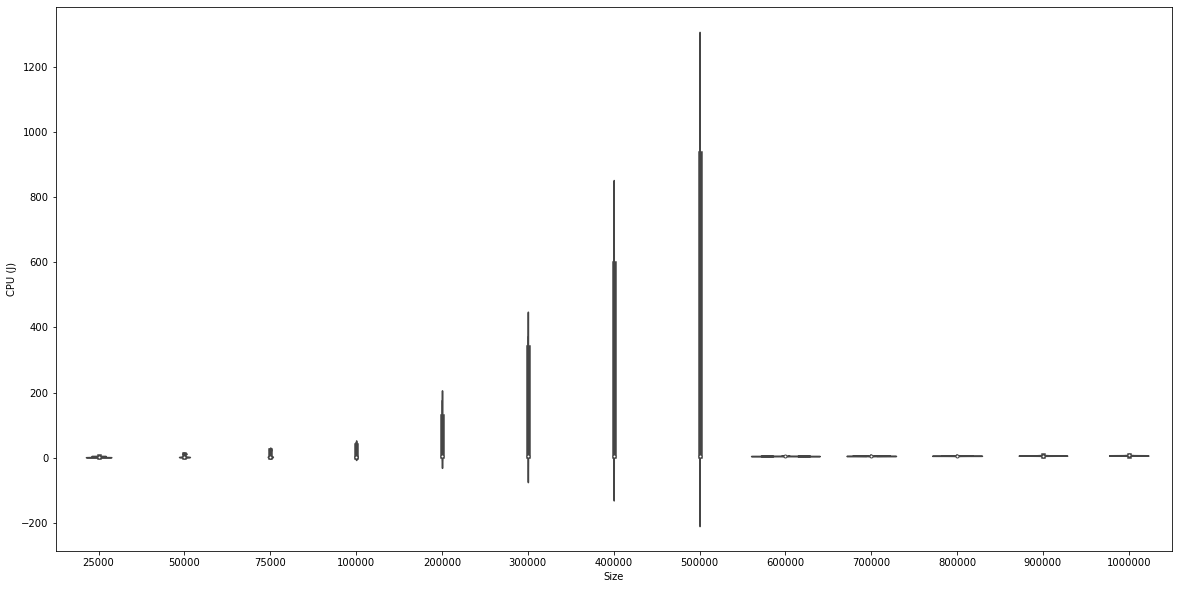

In [21]:
plt.figure(figsize=(20,10))
sns.violinplot(data=quick21, y = "CPU (J)", x = "Size")

In [22]:
def avgData(df):
    s = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
    l = []
    for size in range(len(s)): 
        l.append(df[df["Size"] == s[size]].mean())
    return l

avg16 = avgData(quick16)
avg21 = avgData(quick21)
avg23 = avgData(quick23)
avg6 = avgData(quick6)

avg16[1]

C:\Users\mathi\AppData\Local\Temp/ipykernel_16556/3426784959.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  l.append(df[df["Size"] == s[size]].mean())


PKG (J)            6.147268
CPU (J)            5.375512
Memory (J)         0.238931
Temperature       63.608333
Time (ms)        717.386796
Size           50000.000000
dtype: float64

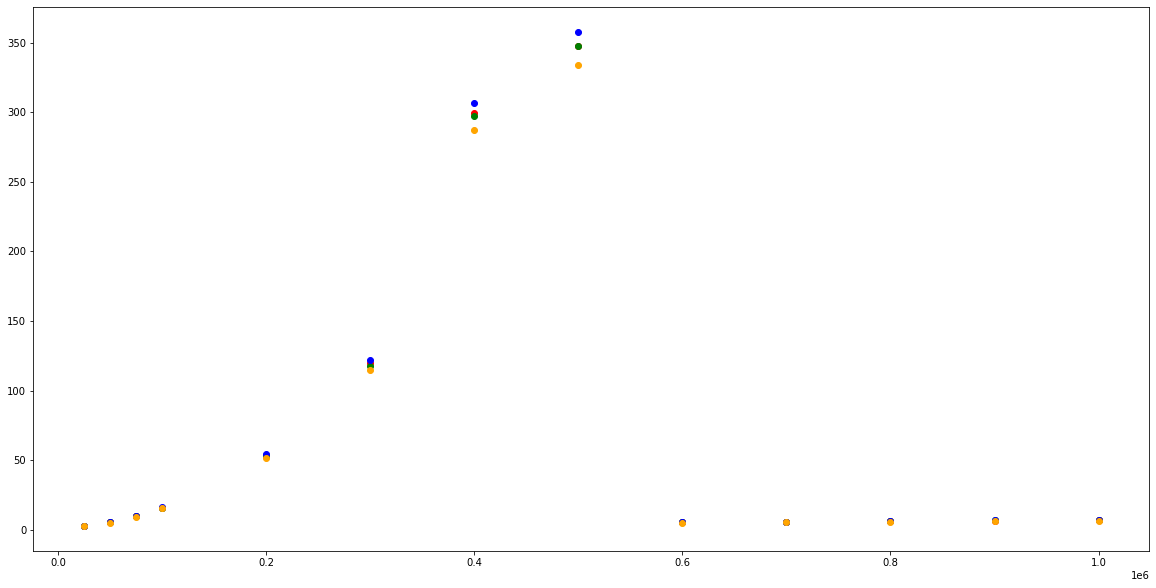

In [25]:
plt.figure(figsize=(20,10))
for i in range(len(avg16)):
    plt.plot( avg16[i]["Size"],avg16[i]["CPU (J)"],"o", color = "red")

for i in range(len(avg21)):
    plt.plot( avg21[i]["Size"],avg21[i]["CPU (J)"],"o", color = "green")

for i in range(len(avg23)):
    plt.plot( avg23[i]["Size"],avg23[i]["CPU (J)"],"o", color = "blue")

for i in range(len(avg6)):
    plt.plot( avg6[i]["Size"],avg6[i]["CPU (J)"],"o", color = "orange")

plt.show()

#### Mergesort


#### Countingsort

#### Bubblesort